# Demo: Prepare training dataset for VCD-Net
Generate patches to feed the VCD-Net model from provided 3D synthetic tubulin images.

We implement a Matlab GUI for this task, which includes light field simulation and several other pre-processings. Check [this repo](https://github.com/feilab-hust/VCD-Net/tree/main/datapre) for downloading. 

Here we embed the Matlab scripts into Jupyter notebook for more convenient demonstration of our VCD-LFM pipeline. These following codes are using matlab kernel. Please select Matlab as the kernel in Jupyter Notebook if it's not. It requires [MATLAB Engine API for Python](https://www.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html) and [imatlab](https://github.com/imatlab/imatlab) for Jupyter kernel. They should be installed on your computer if you intend to run this notebook locally, although we recommend using the Matlab GUI (/code/datapre/Code/Main.m) for simpler environment setup (where only Matlab is required on your computer).

## Step1: Rectify and Augment HR data
In this demo, light field reconstruction has a pre-defined depth range, e.g. -30 to 30 microns. 

This step prepares the 3D stacks (high-resolution Ground Truth) for Forward Projection (light field simulation) by cropping each given stack into substack wth certain number of slice, in corresponding to the light field PSF (point spread function) you use. Here the dataset is optionally augmented by rotation and flip. Consult [this repo](https://github.com/feilab-hust/VCD-Net/tree/main/datapre) for parameter definitions. 

In [1]:
addpath('./Code/utils');
addpath('./Code');
%%%%%%%%%%%%%%%%%%%%%%%%% Substacks Parameters%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
substack_depth = 61;
overlap = 0;
z_sampling = 1;
dx = 11; 
Nnum = 11;
range_adjust = 0.9;
rotation_step = 90;

rectification_enable = 1;
rotation_enable = 0;
complement_stack = 1;
flip_x = 0;
flip_y = 0;
flip_z = 0;

save_path = './data/Substacks';
file_path = '../vcdnet/data/raw_data';
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

file_name = struct2cell(dir(file_path));
file_name = file_name(1,3:end);
if ~iscell(file_name)
    file_name = {file_name};
end

crop_raw_stack(substack_depth, overlap, dx, Nnum, range_adjust, z_sampling, ...
    rotation_step, rectification_enable, rotation_enable, complement_stack, ...
    flip_x, flip_y, flip_z, file_path, file_name, save_path);

disp('Rectify and Augment HR data ... done');

> In path (line 109)
  In addpath (line 88)
  In crop_raw_stack (line 25)
> In crop_raw_stack (line 28)
tubulins3d1_Flip01_Angle000_SUB01.tif ...   done   in 3.5528 sec
tubulins3d10_Flip01_Angle000_SUB01.tif ...   done   in 3.5003 sec
tubulins3d11_Flip01_Angle000_SUB01.tif ...   done   in 3.5766 sec
tubulins3d12_Flip01_Angle000_SUB01.tif ...   done   in 2.9535 sec
tubulins3d13_Flip01_Angle000_SUB01.tif ...   done   in 2.9738 sec
tubulins3d14_Flip01_Angle000_SUB01.tif ...   done   in 4.0873 sec
tubulins3d15_Flip01_Angle000_SUB01.tif ...   done   in 2.9145 sec
tubulins3d16_Flip01_Angle000_SUB01.tif ...   done   in 3.0042 sec
tubulins3d17_Flip01_Angle000_SUB01.tif ...   done   in 3.0872 sec
tubulins3d18_Flip01_Angle000_SUB01.tif ...   done   in 2.9707 sec
tubulins3d19_Flip01_Angle000_SUB01.tif ...   done   in 3.0011 sec
tubulins3d2_Flip01_Angle000_SUB01.tif ...   done   in 3.0949 sec
tubulins3d20_Flip01_Angle000_SUB01.tif ...   done   in 3.0409 sec
tubulins3d3_Flip01_Angle000_SUB01.tif ..

### Do some plottings to examine the outputs.

Figure saved in ../../results/figs/substacks_example.png


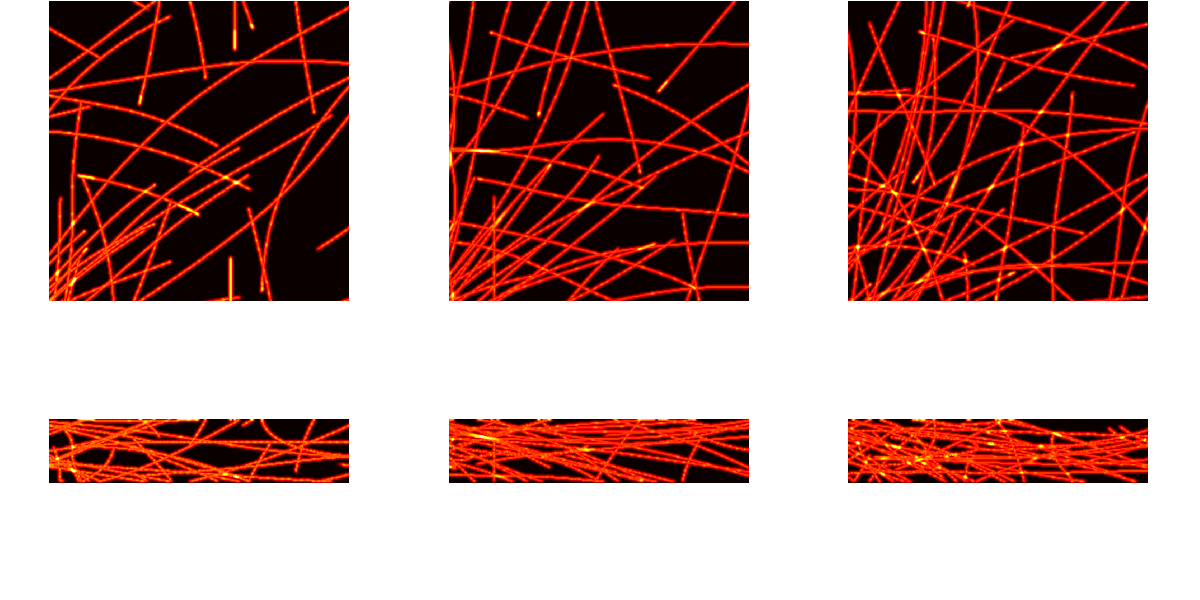

In [2]:
imatlab_export_fig('print-png')

show_some3d(save_path, 3, 1/0.34, 'hot', true, save_path, 'substacks_example.png');

## Step2: Forward Projection
Now we want to simulate the light field raw image in corresponding to each substack. So we can train the VCD-Net between them.

This step transforms the substacks (generated in Step 1) into synthetic 2D light-field raw images. A PSF mat file (/code/datapre/PSFmatrix) is required for this step. We use softwares provided in Prevedel, R., Yoon, Y., Hoffmann, M. et al. Simultaneous whole-animal 3D imaging of neuronal activity using light-field microscopy. Nat Methods 11, 727–730 (2014). https://doi.org/10.1038/nmeth.2964 to compute Light Field PSF. Consult [this repo](https://github.com/feilab-hust/VCD-Net/tree/main/datapre) for parameter definitions.

**This step takes long time: ~ 20 min.**

In [3]:
%%%%%%%%%%%%%%%%%%%%%%%%% Projection Parameters%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
brightness_adjust = 0.0039;
poisson_noise = 0;
gaussian_noise = 0;
gaussian_sigma = 5e-5;
gpu = 0;
 
source_path = './data/Substacks';
save_path = './data/LFforward';
psf_name = 'PSFmatrix_M40NA0.8MLPitch150fml3500from-30to30zspacing1Nnum11lambda580n1.33.mat';
psf_path = './PSFmatrix/';
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

forward_projection([psf_path, psf_name], poisson_noise, gaussian_noise, gaussian_sigma,...
    brightness_adjust, gpu, source_path, save_path);

disp(['Forward Projection ... Done']);

Projected Image : tubulins3d11_Flip01_Angle000_SUB01.tif ... 66.7466sec
Projected Image : tubulins3d12_Flip01_Angle000_SUB01.tif ... 67.6906sec
Projected Image : tubulins3d13_Flip01_Angle000_SUB01.tif ... 66.4195sec
Projected Image : tubulins3d14_Flip01_Angle000_SUB01.tif ... 68.393sec
Projected Image : tubulins3d15_Flip01_Angle000_SUB01.tif ... 68.1741sec
Projected Image : tubulins3d16_Flip01_Angle000_SUB01.tif ... 66.8816sec
Projected Image : tubulins3d17_Flip01_Angle000_SUB01.tif ... 66.4785sec
Projected Image : tubulins3d18_Flip01_Angle000_SUB01.tif ... 67.6125sec
Projected Image : tubulins3d19_Flip01_Angle000_SUB01.tif ... 67.0533sec
Projected Image : tubulins3d1_Flip01_Angle000_SUB01.tif ... 67.5947sec
Projected Image : tubulins3d20_Flip01_Angle000_SUB01.tif ... 68.0576sec
Projected Image : tubulins3d2_Flip01_Angle000_SUB01.tif ... 65.8192sec
Projected Image : tubulins3d3_Flip01_Angle000_SUB01.tif ... 66.6011sec
Projected Image : tubulins3d4_Flip01_Angle000_SUB01.tif ... 67.1476s

### Do some plottings to examine the outputs.

> In show_some2d (line 21)
Figure saved in ../../results/figs/light_field_example.png


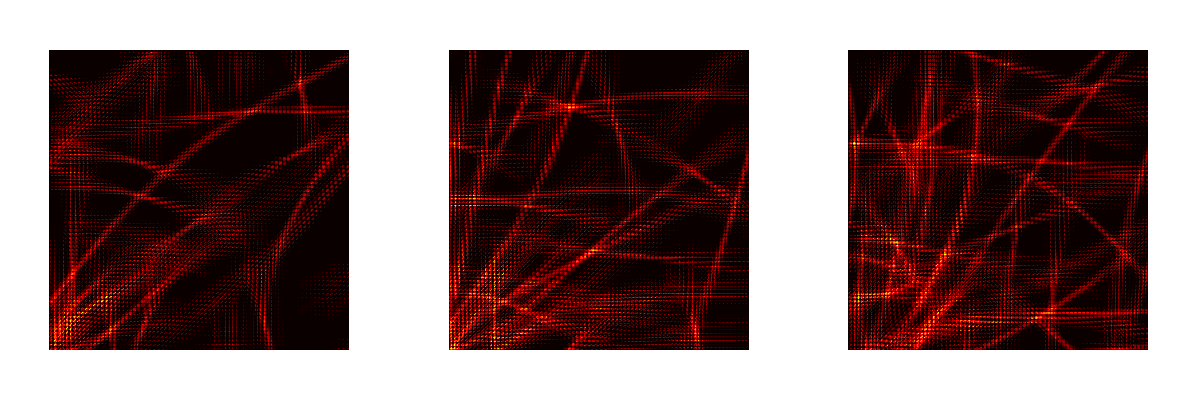

In [4]:
show_some2d(save_path, 3, 'hot', true, save_path, 'light_field_example.png');

## Step3: Generate Patches
We now generate patch pairs with uniform size to feed the VCD-Net. Consult [this repo](https://github.com/feilab-hust/VCD-Net/tree/main/datapre) for parameter definitions. 

In [5]:
%%%%%%%%%%%%%%%%%%%%%%%%%%Crop Parameter%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
cropped_size = [176,176,substack_depth];
overlap = [0.5,0.5,0];
pixel_threshold = 1e6;
var_threshold   = 1e1;
save_all = 0;

source_path_3d = './data/Substacks';
save_path_3d = './data/TrainingPair/WF';
source_path_2d = './data/LFforward';
save_path_2d = './data/TrainingPair/LF';
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

generate_patches(cropped_size, overlap, pixel_threshold, var_threshold, ...
    save_all, source_path_3d, save_path_3d, source_path_2d, save_path_2d)

disp('Crop ...Done');

> In path (line 109)
  In addpath (line 88)
  In generate_patches (line 17)
processing img 1 / 20 : block[1  1  1]   1 : 176, 1 : 176, 1 : 61
sum 1617330 var 5.042968e+01 : saved as 001-000000.tif
processing img 1 / 20 : block[1  2  1]   1 : 176, 89 : 264, 1 : 61
sum 2021121 var 6.297215e+01 : saved as 001-000001.tif
processing img 1 / 20 : block[1  3  1]   1 : 176, 177 : 352, 1 : 61
sum 2294493 var 7.146079e+01 : saved as 001-000002.tif
processing img 1 / 20 : block[1  4  1]   1 : 176, 265 : 440, 1 : 61
sum 2059075 var 6.447414e+01 : saved as 001-000003.tif
processing img 1 / 20 : block[1  5  1]   1 : 176, 353 : 528, 1 : 61
sum 1476996 var 5.177045e+01 : saved as 001-000004.tif
processing img 1 / 20 : block[1  6  1]   1 : 176, 441 : 616, 1 : 61
sum 1706540 var 6.064195e+01 : saved as 001-000005.tif
processing img 1 / 20 : block[1  7  1]   1 : 176, 529 : 704, 1 : 61
sum 2319129 var 7.516087e+01 : saved as 001-000006.tif
processing img 1 / 20 : block[1  8  1]   1 : 176, 617 : 792, 1 : 6

sum 1936946 var 5.503154e+01 : saved as 002-000001.tif
processing img 2 / 20 : block[1  3  1]   1 : 176, 177 : 352, 1 : 61
sum 2742235 var 7.830659e+01 : saved as 002-000002.tif
processing img 2 / 20 : block[1  4  1]   1 : 176, 265 : 440, 1 : 61
sum 3197693 var 9.097906e+01 : saved as 002-000003.tif
processing img 2 / 20 : block[1  5  1]   1 : 176, 353 : 528, 1 : 61
sum 2037723 var 5.740558e+01 : saved as 002-000004.tif
processing img 2 / 20 : block[1  6  1]   1 : 176, 441 : 616, 1 : 61
sum 896929 var 2.596628e+01 : abandoned
processing img 2 / 20 : block[1  7  1]   1 : 176, 529 : 704, 1 : 61
sum 971764 var 2.852557e+01 : abandoned
processing img 2 / 20 : block[1  8  1]   1 : 176, 617 : 792, 1 : 61
sum 1465617 var 4.216770e+01 : saved as 002-000007.tif
processing img 2 / 20 : block[2  1  1]   89 : 264, 1 : 176, 1 : 61
sum 3056698 var 8.668834e+01 : saved as 002-000008.tif
processing img 2 / 20 : block[2  2  1]   89 : 264, 89 : 264, 1 : 61
sum 2715588 var 7.675272e+01 : saved as 002-000

sum 3261618 var 9.252690e+01 : saved as 003-000003.tif
processing img 3 / 20 : block[1  5  1]   1 : 176, 353 : 528, 1 : 61
sum 3332860 var 9.404339e+01 : saved as 003-000004.tif
processing img 3 / 20 : block[1  6  1]   1 : 176, 441 : 616, 1 : 61
sum 2221243 var 6.754219e+01 : saved as 003-000005.tif
processing img 3 / 20 : block[1  7  1]   1 : 176, 529 : 704, 1 : 61
sum 2668929 var 8.062830e+01 : saved as 003-000006.tif
processing img 3 / 20 : block[1  8  1]   1 : 176, 617 : 792, 1 : 61
sum 2718190 var 7.611650e+01 : saved as 003-000007.tif
processing img 3 / 20 : block[2  1  1]   89 : 264, 1 : 176, 1 : 61
sum 3303234 var 9.639827e+01 : saved as 003-000008.tif
processing img 3 / 20 : block[2  2  1]   89 : 264, 89 : 264, 1 : 61
sum 4484586 var 1.275931e+02 : saved as 003-000009.tif
processing img 3 / 20 : block[2  3  1]   89 : 264, 177 : 352, 1 : 61
sum 4231998 var 1.176580e+02 : saved as 003-000010.tif
processing img 3 / 20 : block[2  4  1]   89 : 264, 265 : 440, 1 : 61
sum 3250179 var

processing img 4 / 20 : block[1  7  1]   1 : 176, 529 : 704, 1 : 61
sum 758738 var 2.234164e+01 : abandoned
processing img 4 / 20 : block[1  8  1]   1 : 176, 617 : 792, 1 : 61
sum 759799 var 2.257563e+01 : abandoned
processing img 4 / 20 : block[2  1  1]   89 : 264, 1 : 176, 1 : 61
sum 3291316 var 1.009465e+02 : saved as 004-000008.tif
processing img 4 / 20 : block[2  2  1]   89 : 264, 89 : 264, 1 : 61
sum 3178327 var 1.029915e+02 : saved as 004-000009.tif
processing img 4 / 20 : block[2  3  1]   89 : 264, 177 : 352, 1 : 61
sum 1303653 var 4.339900e+01 : saved as 004-000010.tif
processing img 4 / 20 : block[2  4  1]   89 : 264, 265 : 440, 1 : 61
sum 687219 var 2.022221e+01 : abandoned
processing img 4 / 20 : block[2  5  1]   89 : 264, 353 : 528, 1 : 61
sum 48432 var 1.090397e+00 : abandoned
processing img 4 / 20 : block[2  6  1]   89 : 264, 441 : 616, 1 : 61
sum 845907 var 2.478939e+01 : abandoned
processing img 4 / 20 : block[2  7  1]   89 : 264, 529 : 704, 1 : 61
sum 1810634 var 5.26

processing img 5 / 20 : block[2  2  1]   89 : 264, 89 : 264, 1 : 61
sum 835841 var 2.358884e+01 : abandoned
processing img 5 / 20 : block[2  3  1]   89 : 264, 177 : 352, 1 : 61
sum 2583874 var 7.350820e+01 : saved as 005-000010.tif
processing img 5 / 20 : block[2  4  1]   89 : 264, 265 : 440, 1 : 61
sum 3100294 var 8.875745e+01 : saved as 005-000011.tif
processing img 5 / 20 : block[2  5  1]   89 : 264, 353 : 528, 1 : 61
sum 2091508 var 5.950196e+01 : saved as 005-000012.tif
processing img 5 / 20 : block[2  6  1]   89 : 264, 441 : 616, 1 : 61
sum 2175023 var 6.085577e+01 : saved as 005-000013.tif
processing img 5 / 20 : block[2  7  1]   89 : 264, 529 : 704, 1 : 61
sum 2936954 var 8.269594e+01 : saved as 005-000014.tif
processing img 5 / 20 : block[2  8  1]   89 : 264, 617 : 792, 1 : 61
sum 3477400 var 1.015331e+02 : saved as 005-000015.tif
processing img 5 / 20 : block[3  1  1]   177 : 352, 1 : 176, 1 : 61
sum 2357642 var 6.799384e+01 : saved as 005-000016.tif
processing img 5 / 20 : b

sum 3495277 var 1.062559e+02 : saved as 006-000011.tif
processing img 6 / 20 : block[2  5  1]   89 : 264, 353 : 528, 1 : 61
sum 2427144 var 7.576522e+01 : saved as 006-000012.tif
processing img 6 / 20 : block[2  6  1]   89 : 264, 441 : 616, 1 : 61
sum 1371140 var 4.132177e+01 : saved as 006-000013.tif
processing img 6 / 20 : block[2  7  1]   89 : 264, 529 : 704, 1 : 61
sum 627741 var 1.849956e+01 : abandoned
processing img 6 / 20 : block[2  8  1]   89 : 264, 617 : 792, 1 : 61
sum 1492209 var 4.503716e+01 : saved as 006-000015.tif
processing img 6 / 20 : block[3  1  1]   177 : 352, 1 : 176, 1 : 61
sum 3350555 var 1.022674e+02 : saved as 006-000016.tif
processing img 6 / 20 : block[3  2  1]   177 : 352, 89 : 264, 1 : 61
sum 3093866 var 9.097722e+01 : saved as 006-000017.tif
processing img 6 / 20 : block[3  3  1]   177 : 352, 177 : 352, 1 : 61
sum 3463243 var 1.023784e+02 : saved as 006-000018.tif
processing img 6 / 20 : block[3  4  1]   177 : 352, 265 : 440, 1 : 61
sum 1439447 var 4.3468

processing img 7 / 20 : block[2  7  1]   89 : 264, 529 : 704, 1 : 61
sum 886061 var 2.511571e+01 : abandoned
processing img 7 / 20 : block[2  8  1]   89 : 264, 617 : 792, 1 : 61
sum 529773 var 1.551771e+01 : abandoned
processing img 7 / 20 : block[3  1  1]   177 : 352, 1 : 176, 1 : 61
sum 2144247 var 6.049033e+01 : saved as 007-000016.tif
processing img 7 / 20 : block[3  2  1]   177 : 352, 89 : 264, 1 : 61
sum 3590418 var 1.001677e+02 : saved as 007-000017.tif
processing img 7 / 20 : block[3  3  1]   177 : 352, 177 : 352, 1 : 61
sum 2875622 var 8.096623e+01 : saved as 007-000018.tif
processing img 7 / 20 : block[3  4  1]   177 : 352, 265 : 440, 1 : 61
sum 2186819 var 6.175124e+01 : saved as 007-000019.tif
processing img 7 / 20 : block[3  5  1]   177 : 352, 353 : 528, 1 : 61
sum 2095136 var 5.901912e+01 : saved as 007-000020.tif
processing img 7 / 20 : block[3  6  1]   177 : 352, 441 : 616, 1 : 61
sum 2334691 var 6.550965e+01 : saved as 007-000021.tif
processing img 7 / 20 : block[3  7 

sum 2342945 var 6.950289e+01 : saved as 008-000016.tif
processing img 8 / 20 : block[3  2  1]   177 : 352, 89 : 264, 1 : 61
sum 2300690 var 6.685391e+01 : saved as 008-000017.tif
processing img 8 / 20 : block[3  3  1]   177 : 352, 177 : 352, 1 : 61
sum 1411904 var 4.095217e+01 : saved as 008-000018.tif
processing img 8 / 20 : block[3  4  1]   177 : 352, 265 : 440, 1 : 61
sum 844808 var 2.478488e+01 : abandoned
processing img 8 / 20 : block[3  5  1]   177 : 352, 353 : 528, 1 : 61
sum 916101 var 2.690106e+01 : abandoned
processing img 8 / 20 : block[3  6  1]   177 : 352, 441 : 616, 1 : 61
sum 1122143 var 3.431725e+01 : saved as 008-000021.tif
processing img 8 / 20 : block[3  7  1]   177 : 352, 529 : 704, 1 : 61
sum 1789421 var 5.367177e+01 : saved as 008-000022.tif
processing img 8 / 20 : block[3  8  1]   177 : 352, 617 : 792, 1 : 61
sum 2292100 var 6.731559e+01 : saved as 008-000023.tif
processing img 8 / 20 : block[4  1  1]   265 : 440, 1 : 176, 1 : 61
sum 2331217 var 6.824097e+01 : sa

sum 1598550 var 4.412235e+01 : saved as 009-000019.tif
processing img 9 / 20 : block[3  5  1]   177 : 352, 353 : 528, 1 : 61
sum 2609316 var 7.106700e+01 : saved as 009-000020.tif
processing img 9 / 20 : block[3  6  1]   177 : 352, 441 : 616, 1 : 61
sum 3079319 var 8.890748e+01 : saved as 009-000021.tif
processing img 9 / 20 : block[3  7  1]   177 : 352, 529 : 704, 1 : 61
sum 3470308 var 9.954176e+01 : saved as 009-000022.tif
processing img 9 / 20 : block[3  8  1]   177 : 352, 617 : 792, 1 : 61
sum 3987614 var 1.111308e+02 : saved as 009-000023.tif
processing img 9 / 20 : block[4  1  1]   265 : 440, 1 : 176, 1 : 61
sum 3040231 var 8.956124e+01 : saved as 009-000024.tif
processing img 9 / 20 : block[4  2  1]   265 : 440, 89 : 264, 1 : 61
sum 2584679 var 7.190039e+01 : saved as 009-000025.tif
processing img 9 / 20 : block[4  3  1]   265 : 440, 177 : 352, 1 : 61
sum 2008324 var 5.667666e+01 : saved as 009-000026.tif
processing img 9 / 20 : block[4  4  1]   265 : 440, 265 : 440, 1 : 61
sum

sum 2706938 var 7.269609e+01 : saved as 010-000021.tif
processing img 10 / 20 : block[3  7  1]   177 : 352, 529 : 704, 1 : 61
sum 1914470 var 5.166980e+01 : saved as 010-000022.tif
processing img 10 / 20 : block[3  8  1]   177 : 352, 617 : 792, 1 : 61
sum 721234 var 1.964362e+01 : abandoned
processing img 10 / 20 : block[4  1  1]   265 : 440, 1 : 176, 1 : 61
sum 1426263 var 4.057772e+01 : saved as 010-000024.tif
processing img 10 / 20 : block[4  2  1]   265 : 440, 89 : 264, 1 : 61
sum 1298457 var 3.725413e+01 : saved as 010-000025.tif
processing img 10 / 20 : block[4  3  1]   265 : 440, 177 : 352, 1 : 61
sum 1057186 var 2.784485e+01 : saved as 010-000026.tif
processing img 10 / 20 : block[4  4  1]   265 : 440, 265 : 440, 1 : 61
sum 2444330 var 6.505101e+01 : saved as 010-000027.tif
processing img 10 / 20 : block[4  5  1]   265 : 440, 353 : 528, 1 : 61
sum 2550942 var 6.804460e+01 : saved as 010-000028.tif
processing img 10 / 20 : block[4  6  1]   265 : 440, 441 : 616, 1 : 61
sum 206305

processing img 11 / 20 : block[3  8  1]   177 : 352, 617 : 792, 1 : 61
sum 2155125 var 6.581133e+01 : saved as 011-000023.tif
processing img 11 / 20 : block[4  1  1]   265 : 440, 1 : 176, 1 : 61
sum 1554655 var 4.616368e+01 : saved as 011-000024.tif
processing img 11 / 20 : block[4  2  1]   265 : 440, 89 : 264, 1 : 61
sum 1224817 var 3.760860e+01 : saved as 011-000025.tif
processing img 11 / 20 : block[4  3  1]   265 : 440, 177 : 352, 1 : 61
sum 2917061 var 8.895916e+01 : saved as 011-000026.tif
processing img 11 / 20 : block[4  4  1]   265 : 440, 265 : 440, 1 : 61
sum 3726109 var 1.117284e+02 : saved as 011-000027.tif
processing img 11 / 20 : block[4  5  1]   265 : 440, 353 : 528, 1 : 61
sum 3769935 var 1.109469e+02 : saved as 011-000028.tif
processing img 11 / 20 : block[4  6  1]   265 : 440, 441 : 616, 1 : 61
sum 3825365 var 1.120245e+02 : saved as 011-000029.tif
processing img 11 / 20 : block[4  7  1]   265 : 440, 529 : 704, 1 : 61
sum 3720024 var 1.100388e+02 : saved as 011-000030

sum 4328641 var 1.279151e+02 : saved as 012-000024.tif
processing img 12 / 20 : block[4  2  1]   265 : 440, 89 : 264, 1 : 61
sum 5032833 var 1.502359e+02 : saved as 012-000025.tif
processing img 12 / 20 : block[4  3  1]   265 : 440, 177 : 352, 1 : 61
sum 4842544 var 1.409464e+02 : saved as 012-000026.tif
processing img 12 / 20 : block[4  4  1]   265 : 440, 265 : 440, 1 : 61
sum 4805378 var 1.377104e+02 : saved as 012-000027.tif
processing img 12 / 20 : block[4  5  1]   265 : 440, 353 : 528, 1 : 61
sum 3574112 var 1.031598e+02 : saved as 012-000028.tif
processing img 12 / 20 : block[4  6  1]   265 : 440, 441 : 616, 1 : 61
sum 2840284 var 8.248076e+01 : saved as 012-000029.tif
processing img 12 / 20 : block[4  7  1]   265 : 440, 529 : 704, 1 : 61
sum 2438722 var 7.058080e+01 : saved as 012-000030.tif
processing img 12 / 20 : block[4  8  1]   265 : 440, 617 : 792, 1 : 61
sum 4245307 var 1.249758e+02 : saved as 012-000031.tif
processing img 12 / 20 : block[5  1  1]   353 : 528, 1 : 176, 1 

sum 1569297 var 4.965706e+01 : saved as 013-000027.tif
processing img 13 / 20 : block[4  5  1]   265 : 440, 353 : 528, 1 : 61
sum 846780 var 2.777149e+01 : abandoned
processing img 13 / 20 : block[4  6  1]   265 : 440, 441 : 616, 1 : 61
sum 1306551 var 4.064724e+01 : saved as 013-000029.tif
processing img 13 / 20 : block[4  7  1]   265 : 440, 529 : 704, 1 : 61
sum 2098279 var 6.101998e+01 : saved as 013-000030.tif
processing img 13 / 20 : block[4  8  1]   265 : 440, 617 : 792, 1 : 61
sum 2667327 var 7.633170e+01 : saved as 013-000031.tif
processing img 13 / 20 : block[5  1  1]   353 : 528, 1 : 176, 1 : 61
sum 443061 var 1.301595e+01 : abandoned
processing img 13 / 20 : block[5  2  1]   353 : 528, 89 : 264, 1 : 61
sum 1327823 var 4.032551e+01 : saved as 013-000033.tif
processing img 13 / 20 : block[5  3  1]   353 : 528, 177 : 352, 1 : 61
sum 2573049 var 7.688647e+01 : saved as 013-000034.tif
processing img 13 / 20 : block[5  4  1]   353 : 528, 265 : 440, 1 : 61
sum 1646559 var 4.919202e

sum 1854432 var 5.387628e+01 : saved as 014-000029.tif
processing img 14 / 20 : block[4  7  1]   265 : 440, 529 : 704, 1 : 61
sum 2162330 var 6.090000e+01 : saved as 014-000030.tif
processing img 14 / 20 : block[4  8  1]   265 : 440, 617 : 792, 1 : 61
sum 1460098 var 4.139095e+01 : saved as 014-000031.tif
processing img 14 / 20 : block[5  1  1]   353 : 528, 1 : 176, 1 : 61
sum 4194139 var 1.196832e+02 : saved as 014-000032.tif
processing img 14 / 20 : block[5  2  1]   353 : 528, 89 : 264, 1 : 61
sum 4095270 var 1.155980e+02 : saved as 014-000033.tif
processing img 14 / 20 : block[5  3  1]   353 : 528, 177 : 352, 1 : 61
sum 2786469 var 8.104675e+01 : saved as 014-000034.tif
processing img 14 / 20 : block[5  4  1]   353 : 528, 265 : 440, 1 : 61
sum 1508930 var 4.419496e+01 : saved as 014-000035.tif
processing img 14 / 20 : block[5  5  1]   353 : 528, 353 : 528, 1 : 61
sum 1332521 var 3.761328e+01 : saved as 014-000036.tif
processing img 14 / 20 : block[5  6  1]   353 : 528, 441 : 616, 1 

processing img 15 / 20 : block[4  8  1]   265 : 440, 617 : 792, 1 : 61
sum 1531012 var 4.699056e+01 : saved as 015-000031.tif
processing img 15 / 20 : block[5  1  1]   353 : 528, 1 : 176, 1 : 61
sum 1728448 var 5.149937e+01 : saved as 015-000032.tif
processing img 15 / 20 : block[5  2  1]   353 : 528, 89 : 264, 1 : 61
sum 1960401 var 5.916523e+01 : saved as 015-000033.tif
processing img 15 / 20 : block[5  3  1]   353 : 528, 177 : 352, 1 : 61
sum 2597014 var 7.765444e+01 : saved as 015-000034.tif
processing img 15 / 20 : block[5  4  1]   353 : 528, 265 : 440, 1 : 61
sum 3505066 var 1.056209e+02 : saved as 015-000035.tif
processing img 15 / 20 : block[5  5  1]   353 : 528, 353 : 528, 1 : 61
sum 4214131 var 1.273803e+02 : saved as 015-000036.tif
processing img 15 / 20 : block[5  6  1]   353 : 528, 441 : 616, 1 : 61
sum 3124856 var 9.524328e+01 : saved as 015-000037.tif
processing img 15 / 20 : block[5  7  1]   353 : 528, 529 : 704, 1 : 61
sum 1729745 var 6.044472e+01 : saved as 015-000038

sum 2905328 var 8.285801e+01 : saved as 016-000032.tif
processing img 16 / 20 : block[5  2  1]   353 : 528, 89 : 264, 1 : 61
sum 1358531 var 4.045123e+01 : saved as 016-000033.tif
processing img 16 / 20 : block[5  3  1]   353 : 528, 177 : 352, 1 : 61
sum 1198342 var 3.603326e+01 : saved as 016-000034.tif
processing img 16 / 20 : block[5  4  1]   353 : 528, 265 : 440, 1 : 61
sum 1929946 var 5.527278e+01 : saved as 016-000035.tif
processing img 16 / 20 : block[5  5  1]   353 : 528, 353 : 528, 1 : 61
sum 3131652 var 8.865058e+01 : saved as 016-000036.tif
processing img 16 / 20 : block[5  6  1]   353 : 528, 441 : 616, 1 : 61
sum 4274878 var 1.251030e+02 : saved as 016-000037.tif
processing img 16 / 20 : block[5  7  1]   353 : 528, 529 : 704, 1 : 61
sum 4796368 var 1.390390e+02 : saved as 016-000038.tif
processing img 16 / 20 : block[5  8  1]   353 : 528, 617 : 792, 1 : 61
sum 2501880 var 7.093315e+01 : saved as 016-000039.tif
processing img 16 / 20 : block[6  1  1]   441 : 616, 1 : 176, 1 

processing img 17 / 20 : block[5  4  1]   353 : 528, 265 : 440, 1 : 61
sum 1574945 var 4.499083e+01 : saved as 017-000035.tif
processing img 17 / 20 : block[5  5  1]   353 : 528, 353 : 528, 1 : 61
sum 1130546 var 3.251287e+01 : saved as 017-000036.tif
processing img 17 / 20 : block[5  6  1]   353 : 528, 441 : 616, 1 : 61
sum 2315265 var 6.640194e+01 : saved as 017-000037.tif
processing img 17 / 20 : block[5  7  1]   353 : 528, 529 : 704, 1 : 61
sum 3493707 var 9.964093e+01 : saved as 017-000038.tif
processing img 17 / 20 : block[5  8  1]   353 : 528, 617 : 792, 1 : 61
sum 3153784 var 8.947221e+01 : saved as 017-000039.tif
processing img 17 / 20 : block[6  1  1]   441 : 616, 1 : 176, 1 : 61
sum 1549778 var 4.728416e+01 : saved as 017-000040.tif
processing img 17 / 20 : block[6  2  1]   441 : 616, 89 : 264, 1 : 61
sum 1208847 var 3.699344e+01 : saved as 017-000041.tif
processing img 17 / 20 : block[6  3  1]   441 : 616, 177 : 352, 1 : 61
sum 1551252 var 4.839855e+01 : saved as 017-000042

sum 1666213 var 5.037092e+01 : saved as 018-000036.tif
processing img 18 / 20 : block[5  6  1]   353 : 528, 441 : 616, 1 : 61
sum 1960025 var 5.964756e+01 : saved as 018-000037.tif
processing img 18 / 20 : block[5  7  1]   353 : 528, 529 : 704, 1 : 61
sum 2643572 var 8.389445e+01 : saved as 018-000038.tif
processing img 18 / 20 : block[5  8  1]   353 : 528, 617 : 792, 1 : 61
sum 3240343 var 1.014088e+02 : saved as 018-000039.tif
processing img 18 / 20 : block[6  1  1]   441 : 616, 1 : 176, 1 : 61
sum 4001091 var 1.184526e+02 : saved as 018-000040.tif
processing img 18 / 20 : block[6  2  1]   441 : 616, 89 : 264, 1 : 61
sum 4357741 var 1.377988e+02 : saved as 018-000041.tif
processing img 18 / 20 : block[6  3  1]   441 : 616, 177 : 352, 1 : 61
sum 3815927 var 1.226138e+02 : saved as 018-000042.tif
processing img 18 / 20 : block[6  4  1]   441 : 616, 265 : 440, 1 : 61
sum 1575254 var 4.782320e+01 : saved as 018-000043.tif
processing img 18 / 20 : block[6  5  1]   441 : 616, 353 : 528, 1 

sum 1448658 var 4.846280e+01 : saved as 019-000038.tif
processing img 19 / 20 : block[5  8  1]   353 : 528, 617 : 792, 1 : 61
sum 2123988 var 6.958970e+01 : saved as 019-000039.tif
processing img 19 / 20 : block[6  1  1]   441 : 616, 1 : 176, 1 : 61
sum 5846157 var 1.711349e+02 : saved as 019-000040.tif
processing img 19 / 20 : block[6  2  1]   441 : 616, 89 : 264, 1 : 61
sum 5516900 var 1.646956e+02 : saved as 019-000041.tif
processing img 19 / 20 : block[6  3  1]   441 : 616, 177 : 352, 1 : 61
sum 3040134 var 8.451117e+01 : saved as 019-000042.tif
processing img 19 / 20 : block[6  4  1]   441 : 616, 265 : 440, 1 : 61
sum 1593456 var 4.309894e+01 : saved as 019-000043.tif
processing img 19 / 20 : block[6  5  1]   441 : 616, 353 : 528, 1 : 61
sum 1450728 var 3.974562e+01 : saved as 019-000044.tif
processing img 19 / 20 : block[6  6  1]   441 : 616, 441 : 616, 1 : 61
sum 1336067 var 4.125927e+01 : saved as 019-000045.tif
processing img 19 / 20 : block[6  7  1]   441 : 616, 529 : 704, 1 

sum 2950005 var 9.209436e+01 : saved as 020-000040.tif
processing img 20 / 20 : block[6  2  1]   441 : 616, 89 : 264, 1 : 61
sum 3543648 var 1.052926e+02 : saved as 020-000041.tif
processing img 20 / 20 : block[6  3  1]   441 : 616, 177 : 352, 1 : 61
sum 2730364 var 8.068024e+01 : saved as 020-000042.tif
processing img 20 / 20 : block[6  4  1]   441 : 616, 265 : 440, 1 : 61
sum 3348142 var 9.874869e+01 : saved as 020-000043.tif
processing img 20 / 20 : block[6  5  1]   441 : 616, 353 : 528, 1 : 61
sum 4062708 var 1.200240e+02 : saved as 020-000044.tif
processing img 20 / 20 : block[6  6  1]   441 : 616, 441 : 616, 1 : 61
sum 3980738 var 1.210308e+02 : saved as 020-000045.tif
processing img 20 / 20 : block[6  7  1]   441 : 616, 529 : 704, 1 : 61
sum 4007224 var 1.205290e+02 : saved as 020-000046.tif
processing img 20 / 20 : block[6  8  1]   441 : 616, 617 : 792, 1 : 61
sum 2364428 var 7.116694e+01 : saved as 020-000047.tif
processing img 20 / 20 : block[7  1  1]   529 : 704, 1 : 176, 1 

deleting ../../results/TrainingPair/LF/017-000055.tif-*...
deleting ../../results/TrainingPair/LF/017-000062.tif-*...
deleting ../../results/TrainingPair/LF/017-000063.tif-*...
deleting ../../results/TrainingPair/LF/019-000007.tif-*...
deleting ../../results/TrainingPair/LF/019-000013.tif-*...
deleting ../../results/TrainingPair/LF/019-000015.tif-*...
deleting ../../results/TrainingPair/LF/019-000020.tif-*...
deleting ../../results/TrainingPair/LF/019-000021.tif-*...
deleting ../../results/TrainingPair/LF/019-000022.tif-*...
deleting ../../results/TrainingPair/LF/019-000023.tif-*...
deleting ../../results/TrainingPair/LF/019-000029.tif-*...
deleting ../../results/TrainingPair/LF/019-000052.tif-*...
deleting ../../results/TrainingPair/LF/020-000004.tif-*...
deleting ../../results/TrainingPair/LF/020-000005.tif-*...
deleting ../../results/TrainingPair/LF/020-000007.tif-*...
deleting ../../results/TrainingPair/LF/020-000015.tif-*...
deleting ../../results/TrainingPair/LF/020-000029.tif-*.

### Do some plottings to examine the outputs.

> In show_some3d (line 25)
Figure saved in ../../results/figs/patches_wf_example.png
> In show_some2d (line 21)
Figure saved in ../../results/figs/patches_lf_example.png


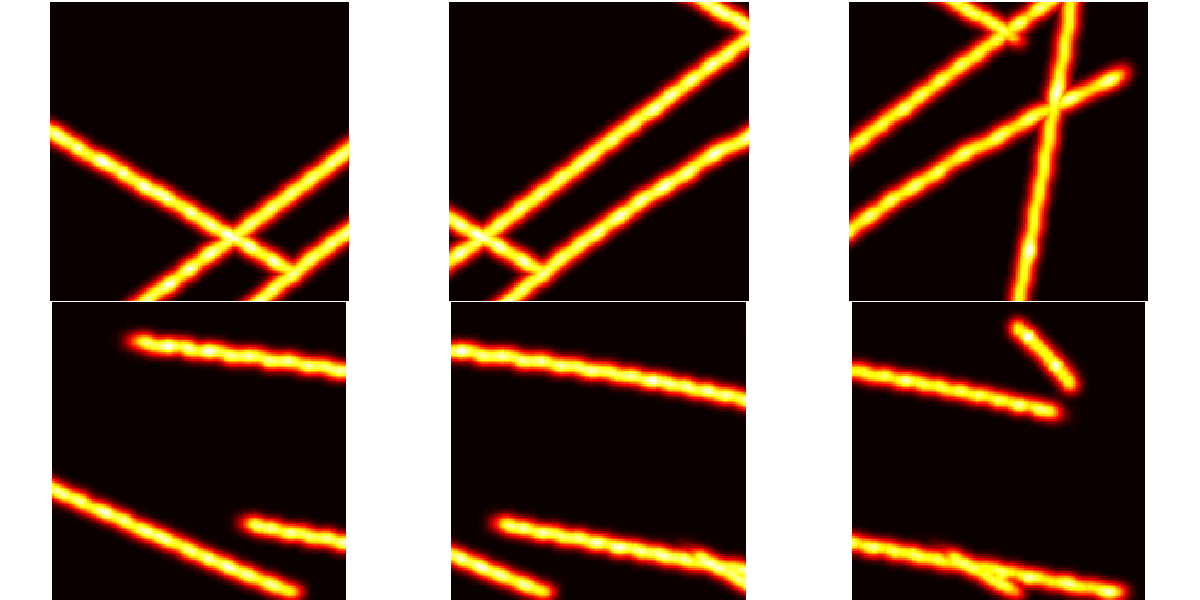

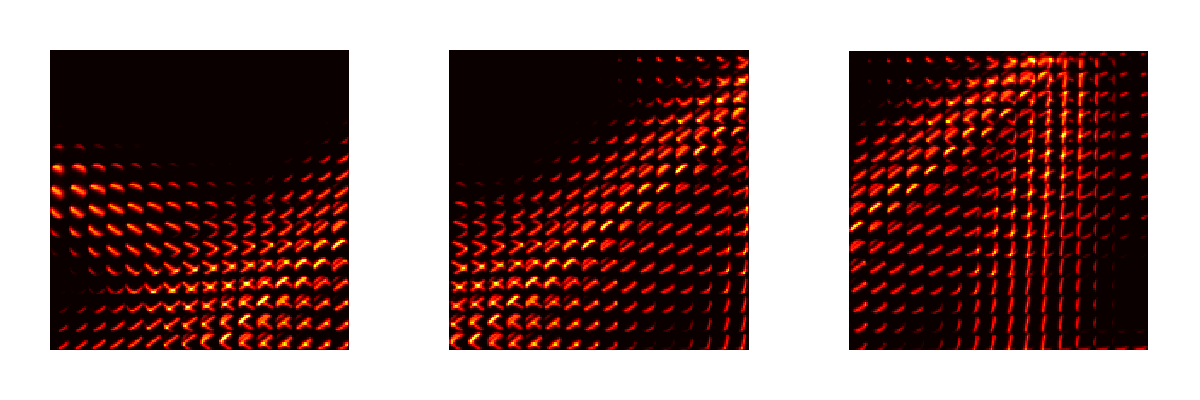

In [6]:
show_some3d('./data/TrainingPair/WF', 3, 1/0.34, 'hot', true, './data/figs', 'patches_wf_example.png');
show_some2d('./data/TrainingPair/LF', 3, 'hot', true, './data/figs', 'patches_lf_example.png'); 

## What's next
Patches are stored in */results/TrainingPair*. Next we should navigate to the [notebook for VCD-Net training](../vcdnet/train_demo.ipynb) to train the model.